# Pymaceuticals Inc. (Working Copy)
---

### Analysis

- Add your analysis here.
 

In [2]:
#%matplotlib notebook

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results,mouse_metadata,on='Mouse ID',how='left')

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupes = merge_df[merge_df.duplicated(['Mouse ID','Timepoint'])]['Mouse ID'].unique()
dupes

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = merge_df.loc[merge_df['Mouse ID'].isin(dupes),:]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop(merge_df[merge_df['Mouse ID'].isin(dupes)].index)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_regimen = clean_df.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
reg_mean = grouped_regimen[['Tumor Volume (mm3)']].mean()
reg_median = grouped_regimen[['Tumor Volume (mm3)']].median()
reg_variance = grouped_regimen[['Tumor Volume (mm3)']].var()
reg_stddev = grouped_regimen[['Tumor Volume (mm3)']].std()
reg_sem = grouped_regimen[['Tumor Volume (mm3)']].sem()

# Assemble the resulting series into a single summary DataFrame.
reg_summary = pd.DataFrame({
    'Mean Tumor Volume': reg_mean['Tumor Volume (mm3)'],
    'Median Tumor Volume': reg_median['Tumor Volume (mm3)'],
    'Tumor Volume Variance': reg_variance['Tumor Volume (mm3)'],
    'Tumor Volume Std. Dev.': reg_stddev['Tumor Volume (mm3)'],
    'Tumor Volume Std. Err.': reg_sem['Tumor Volume (mm3)']
})
reg_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg = grouped_regimen[['Tumor Volume (mm3)']].aggregate(['mean','median','var','std','sem']).style.set_properties(**{'text-align': 'right'})
agg

## Bar and Pie Charts

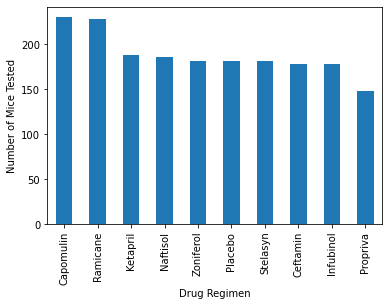

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_sort = grouped_regimen.count().sort_values('Timepoint', ascending = False)
regimen_sort.plot.bar(y = 'Mouse ID', xlabel = 'Drug Regimen', ylabel = 'Number of Mice Tested', legend = False)
plt.show()

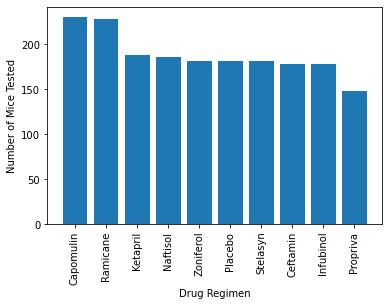

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(regimen_sort.index, regimen_sort['Timepoint'])
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show()

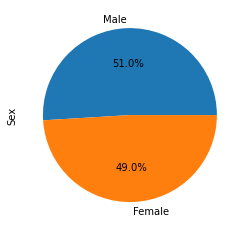

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_sort = clean_df.groupby('Sex').count().sort_values('Sex', ascending = False)
sex_sort.plot(kind = 'pie', y = 'Mouse ID', ylabel = 'Sex', legend = False, autopct='%1.1f%%')
plt.show()

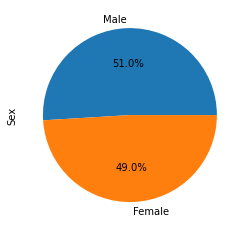

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_sort['Mouse ID'], labels = sex_sort.index, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_time = clean_df.groupby('Mouse ID').max('Timepoint')[['Timepoint']]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
time_merge = pd.merge(final_time,clean_df,on=['Mouse ID','Timepoint'])

In [73]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vols = time_merge.loc[(time_merge['Drug Regimen'] == drug),:]['Tumor Volume (mm3)']
    
    # add subset
    quartiles = tumor_vols.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    tumor_vol_data.append({
        'Drug': drug,
        'Tumor Volumes': tumor_vols,
        'Upper Quartile': upperq,
        'Lower Quartile': lowerq,
        'IQR': iqr,
        'Upper Bound': upper_bound,
        'Lower Bound': lower_bound
    })
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_vols[(tumor_vols > upper_bound) | (tumor_vols < lower_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


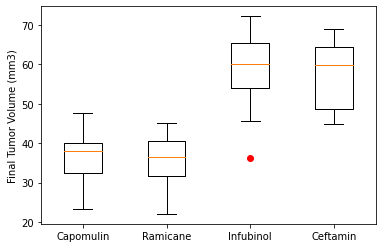

In [105]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
aggregated_volumes = [tumor_vol_data[x]['Tumor Volumes'] for x in range(0, 4)]

plt.boxplot(aggregated_volumes, labels = treatments, sym = 'r') 
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

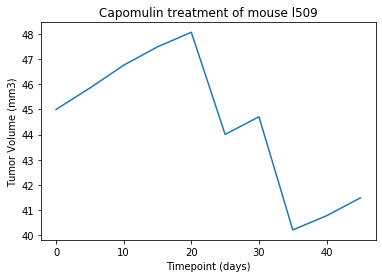

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



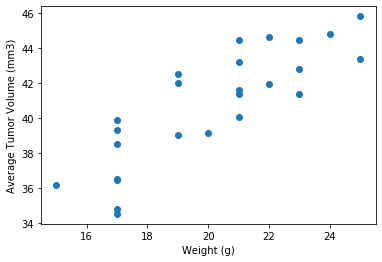

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


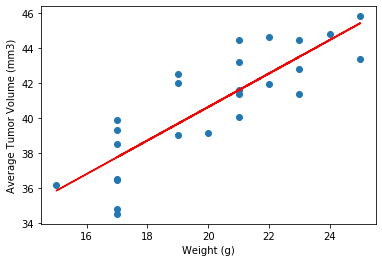

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

